In [108]:
#Import libraries
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [4]:
#Import datasheet with pandas
#rdata = rawdata
rdata = pd.read_csv('data1.csv')

#Display data - raw and unfiltered
rdata

,name,artists,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,duration_ms,explicit,id,release_date
0,Me Tengo Que Ir,"[""Adolescent's Orquesta""]",1996,0.2580,0.451,0.785,0.00000,2,0.1200,-4.701,0,62,0.0362,96.831,0.846,280189,0,3AK05RIuu30jqJ40cfOxLD,1/10/1996
1,Persona Ideal,"[""Adolescent's Orquesta""]",1997,0.4370,0.464,0.511,0.00000,2,0.1490,-11.815,0,62,0.0329,96.856,0.840,283273,0,0u2LbmKA70atp4J59QUnHW,1997
2,Aquel Lugar,"[""Adolescent's Orquesta""]",2008,0.3600,0.747,0.619,0.00000,7,0.1320,-4.706,1,67,0.0360,92.124,0.652,233326,0,2vHNqDJe1qvt1sroQfNHSI,2008
3,Virgen,"[""Adolescent's Orquesta""]",2008,0.6530,0.640,0.796,0.00021,10,0.1150,-4.571,0,66,0.0437,91.306,0.807,273738,0,4ae223xfO5QUzbDWqLJMag,5/1/2008
4,Arrepentida,"[""Adolescent's Orquesta""]",1997,0.4540,0.737,0.614,0.00000,8,0.2850,-11.871,1,54,0.0542,110.929,0.895,251351,0,0f6VT4JZxNc9DE2kUtqlNw,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,I Got the Message,['ZZ Top'],1985,0.0477,0.669,0.894,0.13400,7,0.2520,-11.434,1,31,0.0358,123.252,0.785,207973,0,2aiEUliMu3v4xxbF48Z6WG,10/28/1985
170649,"Heaven, Hell or Houston",['ZZ Top'],1981,0.2150,0.695,0.607,0.02170,9,0.0877,-11.449,1,23,0.0297,111.464,0.518,152427,0,198lkJSVuxsObZYw0dDTK4,7/20/1981
170650,It's so Hard,['ZZ Top'],1981,0.1980,0.773,0.589,0.00284,9,0.0677,-13.181,1,24,0.0312,100.683,0.826,311800,0,0KHlEPAx4YUEeO16kwRpBs,7/20/1981
170651,La Grange,['ZZ Top'],2005,0.0128,0.469,0.532,0.12500,9,0.1180,-15.666,0,38,0.0609,160.914,0.520,234107,0,060SIy6PC30dMWw6wI6292,7/19/2005


In [5]:
#Drops unneccesary columns to save space 
#data = droppeddata
ddata = rdata.drop(columns=['duration_ms','explicit','id','release_date'])

#Rids of ('' [] "") in artist column
#da is originally a 'Series', use .to_frame() to make into DataFrame
da = ddata.artists.str.strip('["]\'').to_frame()
#da = dataframeartist
da

,artists
0,Adolescent's Orquesta
1,Adolescent's Orquesta
2,Adolescent's Orquesta
3,Adolescent's Orquesta
4,Adolescent's Orquesta
...,...
170648,ZZ Top
170649,ZZ Top
170650,ZZ Top
170651,ZZ Top


In [6]:
#must put cleaned artists column into a new DataFrame
df = ddata.assign(artists=da['artists'])
#df = dataframe - will be using from now on
df

,name,artists,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Me Tengo Que Ir,Adolescent's Orquesta,1996,0.2580,0.451,0.785,0.00000,2,0.1200,-4.701,0,62,0.0362,96.831,0.846
1,Persona Ideal,Adolescent's Orquesta,1997,0.4370,0.464,0.511,0.00000,2,0.1490,-11.815,0,62,0.0329,96.856,0.840
2,Aquel Lugar,Adolescent's Orquesta,2008,0.3600,0.747,0.619,0.00000,7,0.1320,-4.706,1,67,0.0360,92.124,0.652
3,Virgen,Adolescent's Orquesta,2008,0.6530,0.640,0.796,0.00021,10,0.1150,-4.571,0,66,0.0437,91.306,0.807
4,Arrepentida,Adolescent's Orquesta,1997,0.4540,0.737,0.614,0.00000,8,0.2850,-11.871,1,54,0.0542,110.929,0.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,I Got the Message,ZZ Top,1985,0.0477,0.669,0.894,0.13400,7,0.2520,-11.434,1,31,0.0358,123.252,0.785
170649,"Heaven, Hell or Houston",ZZ Top,1981,0.2150,0.695,0.607,0.02170,9,0.0877,-11.449,1,23,0.0297,111.464,0.518
170650,It's so Hard,ZZ Top,1981,0.1980,0.773,0.589,0.00284,9,0.0677,-13.181,1,24,0.0312,100.683,0.826
170651,La Grange,ZZ Top,2005,0.0128,0.469,0.532,0.12500,9,0.1180,-15.666,0,38,0.0609,160.914,0.520


In [7]:
#Display data type for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              170653 non-null  object 
 1   artists           170653 non-null  object 
 2   year              170653 non-null  int64  
 3   acousticness      170653 non-null  float64
 4   danceability      170653 non-null  float64
 5   energy            170653 non-null  float64
 6   instrumentalness  170653 non-null  float64
 7   key               170653 non-null  int64  
 8   liveness          170653 non-null  float64
 9   loudness          170653 non-null  float64
 10  mode              170653 non-null  int64  
 11  popularity        170653 non-null  int64  
 12  speechiness       170653 non-null  float64
 13  tempo             170653 non-null  float64
 14  valence           170653 non-null  float64
dtypes: float64(9), int64(4), object(2)
memory usage: 19.5+ MB


In [8]:
#Display some statistics of the data
#There are no null entries (count is same in all columns)
df.describe()

,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,1976.787241,0.502115,0.537396,0.482389,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590,0.528587
std,25.917853,0.376032,0.176138,0.267646,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533,0.263171
min,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1956.000000,0.102000,0.415000,0.255000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000,0.317000
50%,1977.000000,0.516000,0.548000,0.471000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000,0.540000
75%,1999.000000,0.893000,0.668000,0.703000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000,0.747000
max,2020.000000,0.996000,0.988000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000,1.000000


In [89]:
#Splits DataFrame into two sepereate 'train' and 'test' DataFrame for machine learning.
#20% of the origin DataFrame will be used to testing while the other 80% is used for training
train, test = train_test_split(df, test_size=0.2)
dtrain = train.drop(columns = ['name','artists'])
dtest = test.drop(columns = ['name','artists'])

In [83]:
#Randomly selects a song in the training sample and retrieves its features
#rsong = random song, fsong = featuresong
rsong = train.sample(7)
fsong = rsong[['acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence']]
fsong

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
158165,0.000532,0.355,0.706,0.000000,-6.164,0.0309,174.005,0.5230
106630,0.018600,0.615,0.760,0.053000,-8.393,0.0317,90.847,0.9020
30847,0.789000,0.659,0.226,0.000113,-11.787,0.0517,119.687,0.0705
121141,0.681000,0.594,0.130,0.000666,-17.710,0.0372,72.310,0.2980
87304,0.850000,0.261,0.150,0.000034,-11.950,0.0283,84.641,0.1870
120680,0.280000,0.610,0.397,0.000000,-8.506,0.0504,129.761,0.7180
139918,0.007380,0.721,0.669,0.733000,-7.791,0.0488,88.115,0.9500


In [109]:
features = dtrain[['acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence']]

In [50]:
#Gets specific song by searching for name of song and artists.
#Some searches have duplicate records because of re-recordings in different years
#Such as name = Virgen, artists = Adolescent'ts Qrquesta
song= df.loc[(df['name'] == "Do I Wanna Know?") & (df['artists'] == 'Arctic Monkeys')]
songf = song[['artists','acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence']]
songf

,artists,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
9626,Arctic Monkeys,0.186,0.548,0.532,0.000263,-7.596,0.0323,85.03,0.405


In [111]:
#Using the elbow method to find the optimal clustering amount
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dtrain)
    distortions.append(kmeanModel.inertia_)

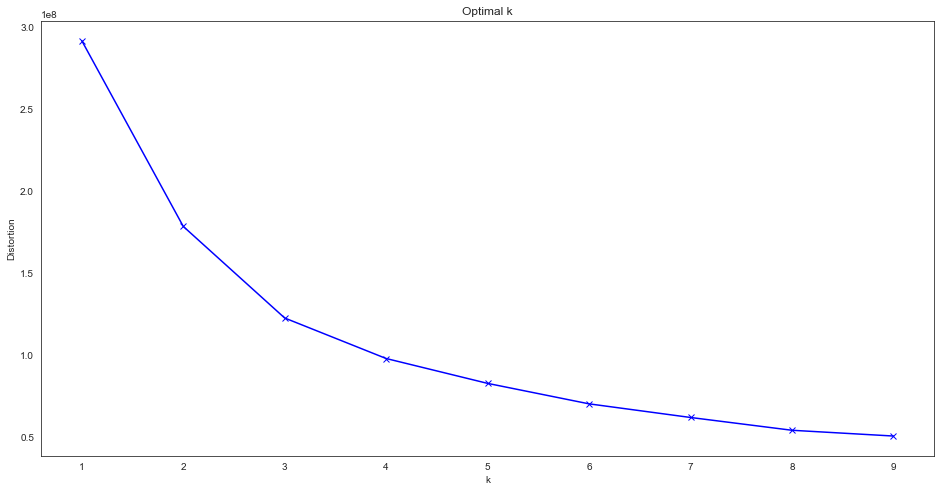

In [113]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k')
plt.show()
#4

In [132]:
km = KMeans(n_clusters = 4)
km.fit(dtrain)
cluster = km.labels_

In [133]:
newdf=dtrain.assign(Cluster=cluster)
grouped=newdf.groupby(["Cluster"])
grouped.agg({'acousticness' : 'mean','danceability' : 'mean','energy' : 'mean','instrumentalness' : 'mean','loudness' : 'mean',
             'speechiness' : 'mean','tempo' : 'mean','valence' : 'mean',})

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
Cluster,,,,,,,,
0,0.703451,0.529031,0.381071,0.229179,-13.246404,0.116777,137.377789,0.587143
1,0.816050,0.474394,0.275763,0.282425,-15.177348,0.130483,88.522975,0.458704
2,0.337306,0.587183,0.571775,0.106333,-9.878533,0.075966,100.873638,0.531892
3,0.262163,0.528488,0.642677,0.089702,-8.587074,0.083884,152.453741,0.539192


In [136]:
newdf_melt=pd.melt(newdf.reset_index(), id_vars =['Cluster'],value_vars=['acousticness','danceability','energy','instrumentalness','loudness','speechiness','tempo','valence'],var_name='Metric',value_name='Value')

In [138]:
newdf[newdf['Cluster']==1 & newdf['year'] >2019]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().